In [2]:
#Reading Data
import json
import numpy as np
import pandas as pd   

ice = pd.read_json('train.json')
test = pd.read_json('test.json')

In [3]:
ice.inc_angle = ice.inc_angle.replace('na', 0)
ice.inc_angle = ice.inc_angle.astype(float).fillna(0.0)

In [4]:
band1 = []
band2 = []

for i in range(1604):
    band1.append(np.reshape(ice.iloc[i,0],(75,75)))
    band2.append(np.reshape(ice.iloc[i,1],(75,75)))



In [5]:
test_band1 = []
test_band2 = []


for i in range(8424):
    test_band1.append(np.reshape(test.iloc[i,0],(75,75)))
    test_band2.append(np.reshape(test.iloc[i,1],(75,75)))

In [6]:

band1 = np.array(band1,dtype='f')
band2 = np.array(band2,dtype='f')
test_band1 = np.array(test_band1,dtype='f')
test_band2 = np.array(test_band2,dtype='f')

In [7]:
#Average of both bands
new_band = []
for i in range(1604):
    new_band.append((band1[i] +band2[i]))
new_band = np.array(new_band,dtype='f')
new_band.shape

(1604, 75, 75)

In [8]:
test_new_band=[]
for i in range(8424):
    test_new_band.append((test_band1[i] + test_band2[i]))
test_new_band = np.array(test_new_band,dtype='f')
test_new_band.shape

(8424, 75, 75)

In [10]:
#Changing Sign

for i in range(1604):
    new_band[i] = np.negative(new_band[i])
    band1[i] = np.negative(band1[i])
    band2[i] = np.negative(band2[i])
for i in range(8424):
    test_new_band[i] = np.negative(test_new_band[i])
    test_band1[i] = np.negative(test_band1[i])
    test_band2[i] = np.negative(test_band2[i])

In [11]:
#Subtracting each column of each pixel by the max value
for i in range(1604):
    for j in range(75):
        new_band[i][j] = np.max(new_band[i][j]) - new_band[i][j]
        band1[i][j] = np.max(band1[i][j]) - band1[i][j]
        band2[i][j] = np.max(band2[i][j]) - band2[i][j]
for i in range(8424):
    for j in range(75):
        test_new_band[i][j] = np.max(test_new_band[i][j]) - test_new_band[i][j]
        test_band1[i][j] = np.max(test_band1[i][j]) - test_band1[i][j]
        test_band2[i][j] = np.max(test_band2[i][j]) - test_band2[i][j]

In [12]:
#Derivative
xd1 = []
xd2 = []
xd3 = []
from scipy import signal
xder = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
for i in range(1604):
    #ax = fig.add_subplot(3,3,i+1)
    arr = signal.convolve2d(band1[i],xder,mode='valid')
    xd1.append(arr)
    arr = signal.convolve2d(band2[i],xder,mode='valid')
    xd2.append(arr)
    arr = signal.convolve2d(new_band[i],xder,mode='valid')
    xd3.append(arr)

    


In [13]:
from sklearn.preprocessing import normalize
for i in range(1604):
    xd3[i] = normalize(xd3[i], axis=1, norm='l1')
    band2[i] = normalize(band2[i],axis=1,norm='l1')
    new_band[i] = normalize(new_band[i],axis=1,norm='l1')
    
for i in range(1604):
    test_new_band[i] = normalize(test_band1[i], axis=1, norm='l1')
    test_band1[i] = normalize(test_band1[i], axis=1, norm='l1')
    test_band2[i] = normalize(test_band2[i], axis=1, norm='l1')

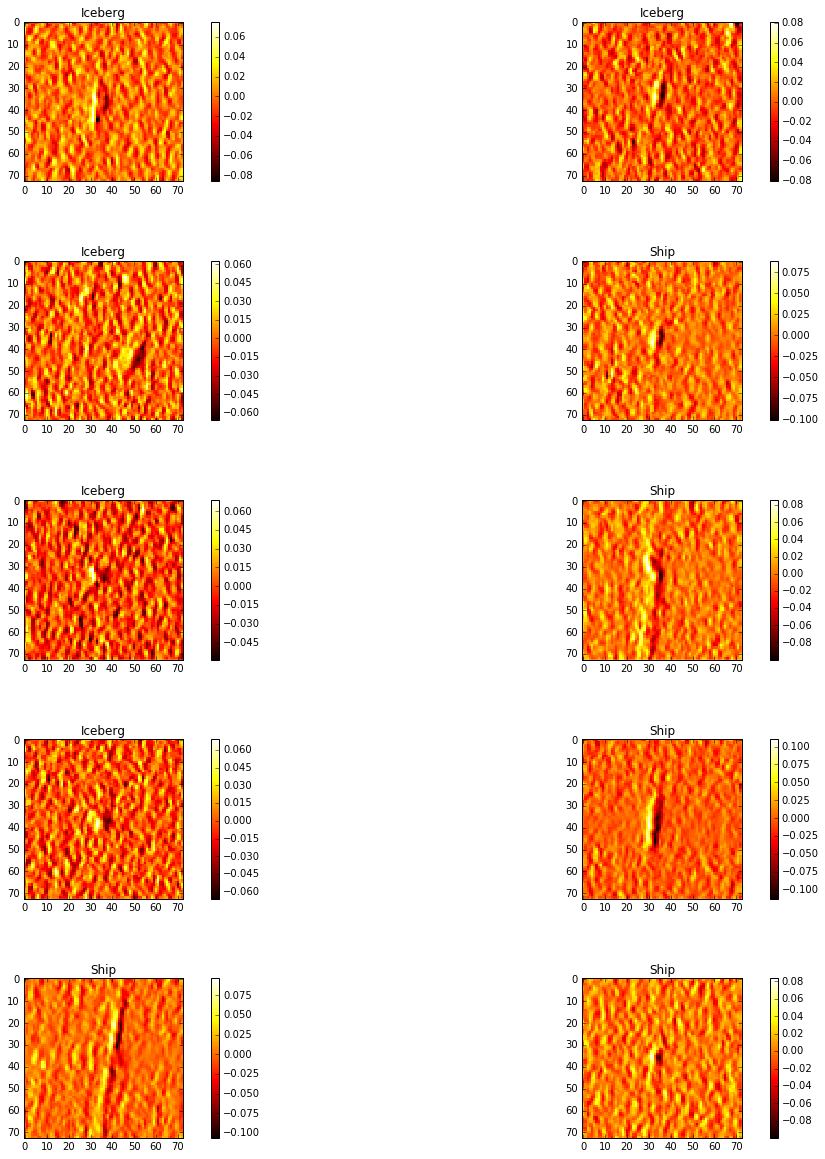

In [14]:
#Visualizing Data
#Since the signs have been inversed these are the inversed images for 10 randomly generated samples of new_band variable
#in the training set
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import random

#Randomly generate 10 unique numbers from the range of 0-1604
random_int = random.sample(range(0,1604),10)
object_class = np.array(ice.iloc[random_int,4])
class_label=[]
for i in range(len(object_class)):
    if object_class[i] == 0:
        class_label.append("Ship")
    else:
        class_label.append("Iceberg")
i=0
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5, wspace=.001)

for image in random_int:
    ax = fig.add_subplot(5,2,i+1)
    im = plt.imshow(xd3[image], cmap='hot', interpolation='none')
    ax.imshow(xd3[image], cmap='hot', interpolation='none')
    plt.title(class_label[i])
    i+=1
    cbar = plt.colorbar(im)
plt.savefig("Prewitt")


In [161]:
xd_test = []
from scipy import signal
for i in range(8424):
    #ax = fig.add_subplot(3,3,i+1)
    arr = signal.convolve2d(test_band1[i],xder,mode='valid')
    xd_test.append(arr)

xd_test

[array([[ 0.01028865,  0.03329448, -0.00946841, ...,  0.0145111 ,
         -0.01654184, -0.01491939],
        [ 0.00270921,  0.02619196, -0.00091331, ...,  0.02059513,
         -0.0078077 , -0.02333184],
        [ 0.00182352,  0.02279312,  0.0015234 , ...,  0.00818503,
         -0.00482934, -0.02012475],
        ..., 
        [-0.00131945, -0.01888838, -0.01478416, ..., -0.00938047,
          0.00966009,  0.01939092],
        [-0.00491628, -0.01469512, -0.00602564, ..., -0.00916619,
         -0.00391799,  0.01401361],
        [-0.01139886, -0.00737465, -0.00173686, ..., -0.01970207,
         -0.01814353,  0.0145444 ]]),
 array([[ 0.        , -0.00825591, -0.00338133, ...,  0.01273384,
         -0.00586447, -0.01012637],
        [ 0.        ,  0.        ,  0.00487457, ...,  0.01950439,
         -0.00931289, -0.01489792],
        [ 0.00262997,  0.        ,  0.        , ...,  0.01485324,
         -0.02106518, -0.00197567],
        ..., 
        [ 0.01165334,  0.        ,  0.        , ...,

In [15]:
xd3 = np.array(xd3)
xd3 = xd3.reshape(xd3.shape[0],73,73,1)
xd3.shape

(1604, 73, 73, 1)

In [163]:
xd_test = np.array(xd_test)
xd_test = xd_test.reshape(xd_test.shape[0],73,73,1)
xd_test.shape

(8424, 73, 73, 1)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras import backend as K
from keras.utils import plot_model
import pydot
K.set_image_dim_ordering('tf')

np.random.seed(1000)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(73,73,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,( 3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,( 3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(GlobalMaxPooling2D())
#model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(xd3[:802],np_utils.to_categorical(ice.iloc[:802,4]),validation_data=(xd3[802:],np_utils.to_categorical(ice.iloc[802:,4])), 
          batch_size=32, nb_epoch=200, verbose=1,shuffle = True)
plot_model(model, to_file='model.png')


/u/vmagadi/anaconda/lib/python2.7/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 802 samples, validate on 802 samples
Epoch 1/200
802/802 [==============================] - 6s - loss: 0.6940 - acc: 0.4863 - val_loss: 0.6873 - val_acc: 0.5698
Epoch 2/200
802/802 [==============================] - 6s - loss: 0.6858 - acc: 0.5761 - val_loss: 0.6679 - val_acc: 0.6983
Epoch 3/200
802/802 [==============================] - 6s - loss: 0.6540 - acc: 0.6446 - val_loss: 0.6170 - val_acc: 0.7170
Epoch 4/200
802/802 [==============================] - 6s - loss: 0.6065 - acc: 0.7032 - val_loss: 0.6253 - val_acc: 0.6347
Epoch 5/200
802/802 [==============================] - 6s - loss: 0.5610 - acc: 0.7207 - val_loss: 0.5541 - val_acc: 0.7132
Epoch 6/200
802/802 [==============================] - 6s - loss: 0.5504 - acc: 0.7170 - val_loss: 0.5459 - val_acc: 0.7244
Epoch 7/200
802/802 [==============================] - 6s - loss: 0.5273 - acc: 0.7494 - val_loss: 0.5366 - val_acc: 0.7195
Epoch 8/200
802/802 [==============================] - 6s - loss: 0.5252 - acc: 0.7481

802/802 [==============================] - 7s - loss: 0.0239 - acc: 0.9975 - val_loss: 0.7041 - val_acc: 0.8017
Epoch 67/200
802/802 [==============================] - 8s - loss: 0.0136 - acc: 1.0000 - val_loss: 0.7227 - val_acc: 0.8017
Epoch 68/200
802/802 [==============================] - 7s - loss: 0.0151 - acc: 1.0000 - val_loss: 0.8725 - val_acc: 0.7731
Epoch 69/200
802/802 [==============================] - 9s - loss: 0.0124 - acc: 1.0000 - val_loss: 0.8697 - val_acc: 0.7768
Epoch 70/200
802/802 [==============================] - 6s - loss: 0.0104 - acc: 1.0000 - val_loss: 0.7719 - val_acc: 0.7993
Epoch 71/200
802/802 [==============================] - 6s - loss: 0.0108 - acc: 1.0000 - val_loss: 0.8268 - val_acc: 0.7868
Epoch 72/200
802/802 [==============================] - 8s - loss: 0.0101 - acc: 1.0000 - val_loss: 0.7927 - val_acc: 0.7968
Epoch 73/200
802/802 [==============================] - 6s - loss: 0.0104 - acc: 0.9988 - val_loss: 0.8794 - val_acc: 0.7818
Epoch 74/200


802/802 [==============================] - 7s - loss: 0.0010 - acc: 1.0000 - val_loss: 1.0919 - val_acc: 0.7843
Epoch 132/200
802/802 [==============================] - 7s - loss: 8.7680e-04 - acc: 1.0000 - val_loss: 1.1058 - val_acc: 0.7855
Epoch 133/200
802/802 [==============================] - 5s - loss: 9.7725e-04 - acc: 1.0000 - val_loss: 1.1044 - val_acc: 0.7855
Epoch 134/200
802/802 [==============================] - 6s - loss: 7.8601e-04 - acc: 1.0000 - val_loss: 1.1231 - val_acc: 0.7880
Epoch 135/200
802/802 [==============================] - 6s - loss: 7.9614e-04 - acc: 1.0000 - val_loss: 1.1129 - val_acc: 0.7868
Epoch 136/200
802/802 [==============================] - 6s - loss: 9.8255e-04 - acc: 1.0000 - val_loss: 1.1501 - val_acc: 0.7818
Epoch 137/200
802/802 [==============================] - 7s - loss: 9.6650e-04 - acc: 1.0000 - val_loss: 1.1776 - val_acc: 0.7818
Epoch 138/200
802/802 [==============================] - 7s - loss: 6.7104e-04 - acc: 1.0000 - val_loss: 1.1

802/802 [==============================] - 6s - loss: 2.0548e-04 - acc: 1.0000 - val_loss: 1.3947 - val_acc: 0.7855
Epoch 195/200
802/802 [==============================] - 6s - loss: 1.5601e-04 - acc: 1.0000 - val_loss: 1.3547 - val_acc: 0.7943
Epoch 196/200
802/802 [==============================] - 6s - loss: 1.8089e-04 - acc: 1.0000 - val_loss: 1.3771 - val_acc: 0.7905
Epoch 197/200
802/802 [==============================] - 6s - loss: 2.1347e-04 - acc: 1.0000 - val_loss: 1.4263 - val_acc: 0.7843
Epoch 198/200
802/802 [==============================] - 6s - loss: 1.4830e-04 - acc: 1.0000 - val_loss: 1.3767 - val_acc: 0.7930
Epoch 199/200
802/802 [==============================] - 6s - loss: 1.6478e-04 - acc: 1.0000 - val_loss: 1.3850 - val_acc: 0.7893
Epoch 200/200
802/802 [==============================] - 6s - loss: 1.2166e-04 - acc: 1.0000 - val_loss: 1.3743 - val_acc: 0.7930


In [62]:
final_prediction = model.predict_proba(vertical_stack_test,verbose=1)


8424/8424 [==============================] - 72s    


In [63]:
result=pd.read_csv('sample_iceberg.csv')
predi = pd.DataFrame(final_prediction)
nresult=pd.DataFrame()
nresult['id'] = test['id']
nresult['is_iceberg'] = predi.iloc[:,1]
nresult.to_csv('result.csv', index=False)


'"predi.columns=[\'0\',\'is_iceberg\']\nresult.iloc[:,1] = predi.iloc[:,1]\nprint(result)'